In [1]:
%%time
import numpy as np
# from tempfile import TemporaryFile
import os
import pickle
import random 
import operator
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import IPython.display as ipd
import time

CPU times: user 936 ms, sys: 421 ms, total: 1.36 s
Wall time: 11.1 s


In [2]:
%%time
import librosa 
import librosa.display

CPU times: user 744 ms, sys: 724 ms, total: 1.47 s
Wall time: 16 s


In [3]:
import tensorflow as tf

2022-04-23 19:19:29.167534: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [4]:
# %%time
# directory = "../data/"
# data = []
# classes = []
# for folder in os.listdir(directory):
#     if folder=="mf_files":
#         continue
#     for file in os.listdir(directory+folder):  
#         sig, rate = librosa.load(directory+folder+"/"+file)
        
#         # MFCC
#         mfcc_feat = librosa.feature.mfcc(y =sig, sr= rate)
#         mfcc_mean = mfcc_feat.mean(1)
#         mfcc_var = mfcc_feat.var(1)
        
#         # Spectral Centroid
#         spec_centroid = librosa.feature.spectral_centroid(y= sig, sr = rate)
#         spec_centroid_mean = spec_centroid.mean(1)
#         spec_centroid_var = spec_centroid.var(1)
        
#         # Spectral-Bandwidth
#         spec_band = librosa.feature.spectral_bandwidth(y=sig, sr= rate)
#         spec_band_mean = spec_band.mean(1)
#         spec_band_var = spec_band.var(1)
        
#         # Zero-Crossing Rate
#         zero_cr = librosa.feature.zero_crossing_rate(sig)
#         zero_cr_mean = zero_cr.mean(1)
#         zero_cr_var = zero_cr.var(1)
        
#         # Spectral-Rolloff
#         rolloff = librosa.feature.spectral_rolloff(y = sig, sr = rate)
#         rolloff_mean = rolloff.mean(1)
#         rolloff_var = rolloff.var(1)
        
#         # Tempo
#         onset_env = librosa.onset.onset_strength(y=sig, sr=rate)
#         tempo = librosa.beat.tempo(onset_envelope=onset_env, sr=rate)
        
#         # Chroma
#         chroma = librosa.feature.chroma_stft(y=sig, sr = rate)
#         chroma_mean = chroma.mean(1) 
#         chroma_var = chroma.var(1)
        
#         # RMS
#         S, phase = librosa.magphase(librosa.stft(sig))
#         rms = librosa.feature.rms(S=S)
#         rms_mean = rms.mean(1)
#         rms_var = rms.var(1)
        
#         data.append(np.array([mfcc_mean, mfcc_var,
#                              spec_centroid_mean, spec_centroid_var,
#                              spec_band_mean, spec_band_var,
#                              zero_cr_mean, zero_cr_var,
#                              rolloff_mean, rolloff_var,
#                              tempo,
#                              chroma_mean, chroma_var,
#                              rms_mean, rms_var]).flatten())
#         classes.append(folder)
# df = np.array([np.array(np.hstack(row)) for row in data])
# pd.DataFrame(df).to_csv("all_features.csv")

In [5]:
%%time
directory = "../data/"
data = []
classes = []
for folder in os.listdir(directory):
    if folder=="mf_files":
        continue
    for file in os.listdir(directory+folder):  
        sig, rate = librosa.load(directory+folder+"/"+file)
        mfcc_feat = librosa.feature.mfcc(y =sig, sr= rate)
        data.append(mfcc_feat)
        classes.append(folder)

CPU times: user 3min 59s, sys: 22.4 s, total: 4min 21s
Wall time: 1min 12s


In [6]:
poor_data = []
for i in range(len(data)):
#     print(data[i].shape)
    if data[i].shape != (20,1293):
        print(i, "\t", data[i].shape)
        poor_data.append(i)
print(len(poor_data))

4 	 (20, 1305)
64 	 (20, 1308)
65 	 (20, 1310)
73 	 (20, 1292)
83 	 (20, 1292)
112 	 (20, 1292)
113 	 (20, 1308)
148 	 (20, 1292)
155 	 (20, 1307)
162 	 (20, 1303)
167 	 (20, 1296)
169 	 (20, 1292)
170 	 (20, 1297)
185 	 (20, 1296)
405 	 (20, 1300)
427 	 (20, 1308)
437 	 (20, 1294)
440 	 (20, 1304)
463 	 (20, 1308)
473 	 (20, 1303)
487 	 (20, 1301)
490 	 (20, 1313)
606 	 (20, 1314)
608 	 (20, 1296)
615 	 (20, 1309)
617 	 (20, 1296)
646 	 (20, 1292)
647 	 (20, 1300)
671 	 (20, 1292)
696 	 (20, 1308)
703 	 (20, 1298)
747 	 (20, 1296)
755 	 (20, 1305)
756 	 (20, 1299)
765 	 (20, 1305)
791 	 (20, 1292)
798 	 (20, 1305)
799 	 (20, 1302)
800 	 (20, 1320)
801 	 (20, 1320)
804 	 (20, 1320)
805 	 (20, 1305)
810 	 (20, 1305)
811 	 (20, 1320)
814 	 (20, 1300)
815 	 (20, 1320)
822 	 (20, 1308)
831 	 (20, 1308)
832 	 (20, 1320)
845 	 (20, 1298)
846 	 (20, 1320)
852 	 (20, 1290)
859 	 (20, 1292)
870 	 (20, 1320)
877 	 (20, 1320)
896 	 (20, 1320)
56


In [24]:
usable_data = np.stack([element for i,element in enumerate(data) if i not in poor_data])
usable_classes = np.array([element for i,element in enumerate(classes) if i not in poor_data])

usable_data = usable_data[:,:,:, np.newaxis]
print(usable_data.shape)
print(usable_classes.shape)

(944, 20, 1293, 1)
(944,)


In [25]:
label_dict = {}
for i, element in enumerate(np.unique(usable_classes)):
    label_dict[element] = i
print(label_dict)
# convert from string to int

{'blues': 0, 'classical': 1, 'country': 2, 'disco': 3, 'hiphop': 4, 'jazz': 5, 'metal': 6, 'pop': 7, 'reggae': 8, 'rock': 9}


In [26]:
usable_labels = np.array([label_dict[element] for element in list(usable_classes)])

In [27]:
inv_labels = {v: k for k, v in label_dict.items()}

In [28]:
from sklearn.model_selection import train_test_split
trainX, testX, trainY, testY = train_test_split(usable_data, 
                                                usable_labels,
                                                test_size = 0.25, 
                                                random_state=29,
                                                stratify = usable_labels)

In [29]:
trainX.shape

(708, 20, 1293, 1)

### MFCC: No Scaling

Overfitting:
* Regularization
* Batch Normalization
* Dropout Layers:
    * tf.keras.layers.Dropout(rate=0.2) 
    * 0.20-0.3 in RNN and 0.4-.5 in CNN

Try with ReLU layers
or Elu or SELU layers:
* tf.keras.layers.Dense(64, kernel_initializer='lecun_normal', activation='selu')
* tf.keras.layers.Dense(64, kernel_initializer='he_normal',
                                activation= 'elu')
                                


In [13]:
def plot_results(fit):
    plt.figure(figsize=(20,15))
    fig, ax = plt.subplots(2)
    # accuracy subplot
    ax[0].plot(fit.history["accuracy"], label="train")
    ax[0].plot(fit.history["val_accuracy"], label="test")    
    ax[0].set_ylabel("Accuracy")
    ax[0].legend(loc="lower right")
    ax[0].set_title("Accuracy")
    
    # Error subplot
    ax[1].plot(fit.history["loss"], label="train error")
    ax[1].plot(fit.history["val_loss"], label="test error")    
    ax[1].set_ylabel("Error")
    ax[1].set_xlabel("Epoch")
    ax[1].legend(loc="upper right")
    ax[1].set_title("Error")
    plt.tight_layout()
    plt.show()

In [14]:
train_times = []

### Basic CNN
---
Book's example for MNIST. Also incorporate Early Stopping:


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 20, 1293, 64)      640       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 10, 647, 64)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 10, 647, 128)      73856     
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 10, 647, 128)      147584    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 324, 128)       0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 5, 324, 256)       295168    
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 5, 324, 256)      

Epoch 39/100
23/23 [==============================] - 7s 296ms/step - loss: 0.6339 - accuracy: 0.9797 - val_loss: 4.0415 - val_accuracy: 0.4153
Epoch 40/100
23/23 [==============================] - 7s 296ms/step - loss: 0.5505 - accuracy: 0.9987 - val_loss: 4.1355 - val_accuracy: 0.4364
Epoch 41/100
23/23 [==============================] - 7s 296ms/step - loss: 0.5464 - accuracy: 0.9921 - val_loss: 4.4081 - val_accuracy: 0.4153
Epoch 42/100
23/23 [==============================] - 7s 296ms/step - loss: 0.5078 - accuracy: 0.9977 - val_loss: 4.6341 - val_accuracy: 0.3898
Epoch 43/100
23/23 [==============================] - 7s 296ms/step - loss: 0.4982 - accuracy: 0.9963 - val_loss: 4.6520 - val_accuracy: 0.4195
Epoch 44/100
23/23 [==============================] - 7s 296ms/step - loss: 0.4922 - accuracy: 0.9955 - val_loss: 4.6649 - val_accuracy: 0.4407
Epoch 45/100
23/23 [==============================] - 7s 296ms/step - loss: 0.4676 - accuracy: 0.9968 - val_loss: 5.0964 - val_accuracy:

<Figure size 1440x1080 with 0 Axes>

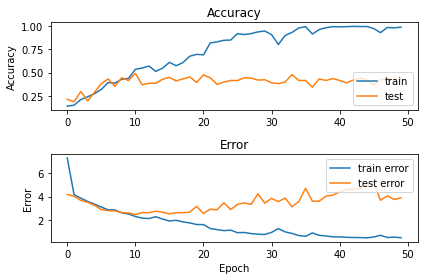

0.4364406779661017
CPU times: user 2min 47s, sys: 1min 6s, total: 3min 53s
Wall time: 5min 41s


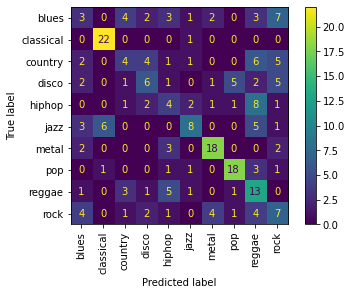

In [32]:
%%time
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=64, kernel_size =(3,3), strides = (1,1),
                           activation = "relu", padding = "same",
                           input_shape=(trainX.shape[1], trainX.shape[2], trainX.shape[3])),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), padding = "same"),
    
    tf.keras.layers.Conv2D(filters=128, kernel_size =(3,3), strides = (1,1),
                           activation = "relu", padding = "same"),
    tf.keras.layers.Conv2D(filters=128, kernel_size =(3,3), strides = (1,1),
                           activation = "relu", padding = "same"),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), padding = "same"),
    
    tf.keras.layers.Conv2D(filters=256, kernel_size =(3,3), strides = (1,1),
                           activation = "relu", padding = "same"),
    tf.keras.layers.Conv2D(filters=256, kernel_size =(3,3), strides = (1,1),
                           activation = "relu", padding = "same"),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), padding = "same"),
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(512, activation= "relu", 
                          kernel_regularizer = tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(rate=0.01),
    tf.keras.layers.Dense(256, activation = "relu", 
                          kernel_regularizer = tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(rate=0.03),
    tf.keras.layers.Dense(128, activation = "relu", 
                          kernel_regularizer = tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(rate=0.01),
    tf.keras.layers.Dense(64, activation = "relu", 
                          kernel_regularizer = tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(rate=0.01),
    tf.keras.layers.Dense(10, activation = "linear")
])
## get output layer as logits for each class 
##(we can use softmax to get probabilities, but doing so makes model unstable:
# https://www.tensorflow.org/tutorials/quickstart/beginner
model.summary()
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

start = time.time()
fit = model.fit(trainX, trainY,
                validation_data = (testX,testY),
                epochs = 100,
                callbacks = [callback])
stop = time.time()
train_times.append(stop-start)


plot_results(fit)

probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(testX)
pred_labels = [np.argmax(prediction) for i,prediction in enumerate(predictions)]

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

ConfusionMatrixDisplay.from_predictions(
    y_true = [inv_labels[e] for i,e in enumerate(testY)],
    y_pred = [inv_labels[e] for i,e in enumerate(pred_labels)], 
    xticks_rotation= "vertical")
print(accuracy_score(testY,pred_labels))

### Prevent-overfitting
---


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 20, 1293, 64)      640       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 10, 647, 64)       0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 10, 647, 128)      73856     
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 10, 647, 128)      147584    
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 5, 324, 128)       0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 5, 324, 256)       295168    
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 5, 324, 256)      

<Figure size 1440x1080 with 0 Axes>

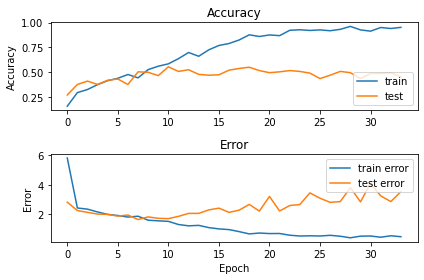

0.4533898305084746
CPU times: user 1min 38s, sys: 38.4 s, total: 2min 16s
Wall time: 3min 19s


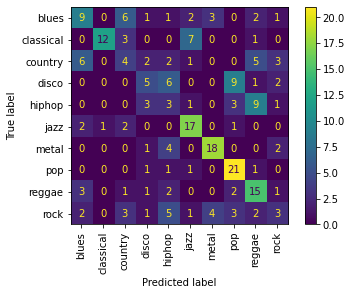

In [33]:
%%time
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=64, kernel_size =(3,3), strides = (1,1),
                           activation = "relu", padding = "same",
                           input_shape=(trainX.shape[1], trainX.shape[2], trainX.shape[3])),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), padding = "same"),
    
    tf.keras.layers.Conv2D(filters=128, kernel_size =(3,3), strides = (1,1),
                           activation = "relu", padding = "same"),
    tf.keras.layers.Conv2D(filters=128, kernel_size =(3,3), strides = (1,1),
                           activation = "relu", padding = "same"),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), padding = "same"),
    
    tf.keras.layers.Conv2D(filters=256, kernel_size =(3,3), strides = (1,1),
                           activation = "relu", padding = "same"),
    tf.keras.layers.Conv2D(filters=256, kernel_size =(3,3), strides = (1,1),
                           activation = "relu", padding = "same"),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), padding = "same"),
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(128, activation = "relu", 
                          kernel_regularizer = tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(rate=0.4),
    tf.keras.layers.Dense(64, activation = "relu", 
                          kernel_regularizer = tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(rate=0.01),
    tf.keras.layers.Dense(10, activation = "linear")
])
## get output layer as logits for each class 
##(we can use softmax to get probabilities, but doing so makes model unstable:
# https://www.tensorflow.org/tutorials/quickstart/beginner
model.summary()
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

start = time.time()
fit = model.fit(trainX, trainY,
                validation_data = (testX,testY),
                epochs = 100,
                callbacks = [callback])
stop = time.time()
train_times.append(stop-start)


plot_results(fit)

probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(testX)
pred_labels = [np.argmax(prediction) for i,prediction in enumerate(predictions)]

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

ConfusionMatrixDisplay.from_predictions(
    y_true = [inv_labels[e] for i,e in enumerate(testY)],
    y_pred = [inv_labels[e] for i,e in enumerate(pred_labels)], 
    xticks_rotation= "vertical")
print(accuracy_score(testY,pred_labels))

### With Batch Normalization

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 20, 1293, 64)      640       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 10, 647, 64)       0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 10, 647, 64)       256       
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 10, 647, 32)       18464     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 5, 324, 32)        0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 5, 324, 32)        128       
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 5, 324, 16)       

<Figure size 1440x1080 with 0 Axes>

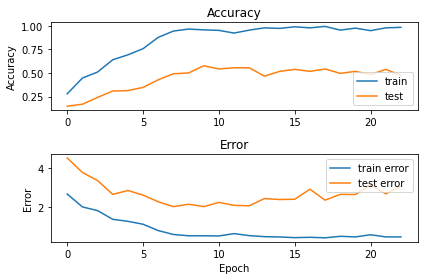

0.4745762711864407
CPU times: user 19.5 s, sys: 6.51 s, total: 26 s
Wall time: 38.1 s


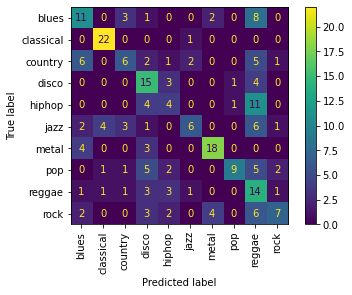

In [35]:
%%time
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=64, kernel_size =(3,3), strides = (1,1),
                           activation = "relu", padding = "same",
                           input_shape=(trainX.shape[1], trainX.shape[2], trainX.shape[3])),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), padding = "same"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=32, kernel_size =(3,3), strides = (1,1),
                           activation = "relu", padding = "same"),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), padding = "same"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=16, kernel_size =(3,3), strides = (1,1),
                           activation = "relu", padding = "same"),
    tf.keras.layers.Conv2D(filters=16, kernel_size =(3,3), strides = (1,1),
                           activation = "relu", padding = "same"),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), padding = "same"),
    tf.keras.layers.BatchNormalization(),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = "relu", 
                          kernel_regularizer = tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(64, activation = "relu", 
                          kernel_regularizer = tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(rate=0.01),
    tf.keras.layers.Dense(10, activation = "linear")
])
## get output layer as logits for each class 
##(we can use softmax to get probabilities, but doing so makes model unstable:
# https://www.tensorflow.org/tutorials/quickstart/beginner
model.summary()
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

start = time.time()
fit = model.fit(trainX, trainY,
                validation_data = (testX,testY),
                epochs = 100,
                callbacks = [callback])
stop = time.time()
train_times.append(stop-start)


plot_results(fit)

probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(testX)
pred_labels = [np.argmax(prediction) for i,prediction in enumerate(predictions)]

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

ConfusionMatrixDisplay.from_predictions(
    y_true = [inv_labels[e] for i,e in enumerate(testY)],
    y_pred = [inv_labels[e] for i,e in enumerate(pred_labels)], 
    xticks_rotation= "vertical")
print(accuracy_score(testY,pred_labels))

### Simpler Model (reduce Overfitting)

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_41 (Conv2D)           (None, 20, 1293, 64)      640       
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 10, 647, 64)       0         
_________________________________________________________________
batch_normalization_18 (Batc (None, 10, 647, 64)       256       
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 10, 647, 32)       18464     
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 5, 324, 32)        0         
_________________________________________________________________
batch_normalization_19 (Batc (None, 5, 324, 32)        128       
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 5, 324, 32)      

23/23 [==============================] - 2s 66ms/step - loss: 0.3063 - accuracy: 0.9690 - val_loss: 3.5866 - val_accuracy: 0.5254
Epoch 42/100
23/23 [==============================] - 2s 66ms/step - loss: 0.3101 - accuracy: 0.9652 - val_loss: 2.5947 - val_accuracy: 0.5466
Epoch 43/100
23/23 [==============================] - 2s 66ms/step - loss: 0.2727 - accuracy: 0.9772 - val_loss: 3.0731 - val_accuracy: 0.5254
Epoch 44/100
23/23 [==============================] - 2s 66ms/step - loss: 0.2772 - accuracy: 0.9782 - val_loss: 3.0785 - val_accuracy: 0.5212
Epoch 45/100
23/23 [==============================] - 2s 66ms/step - loss: 0.3237 - accuracy: 0.9669 - val_loss: 3.4032 - val_accuracy: 0.4788
Epoch 46/100
23/23 [==============================] - 2s 66ms/step - loss: 0.3020 - accuracy: 0.9706 - val_loss: 3.0385 - val_accuracy: 0.5424


<Figure size 1440x1080 with 0 Axes>

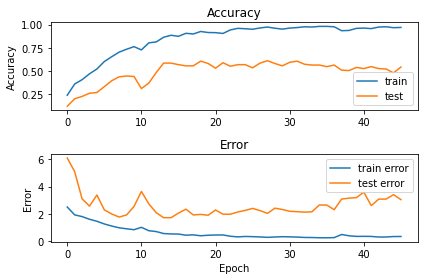

0.5423728813559322
CPU times: user 35.7 s, sys: 12.4 s, total: 48.1 s
Wall time: 1min 11s


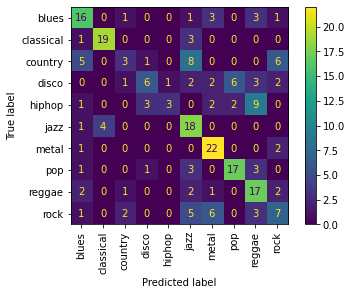

In [39]:
%%time
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=64, kernel_size =(3,3), strides = (1,1),
                           activation = "relu", padding = "same",
                           input_shape=(trainX.shape[1], trainX.shape[2], trainX.shape[3])),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), padding = "same"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=32, kernel_size =(3,3), strides = (1,1),
                           activation = "relu", padding = "same"),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), padding = "same"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=32, kernel_size =(2,2), strides = (1,1),
                           activation = "relu", padding = "same"),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), padding = "same"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=16, kernel_size =(1,1), strides = (1,1),
                           activation = "relu", padding = "same"),
    tf.keras.layers.MaxPool2D(pool_size=(1,1), padding = "same"),
    tf.keras.layers.BatchNormalization(),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation = "relu", 
                          kernel_regularizer = tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(10, activation = "linear")
])
## get output layer as logits for each class 
##(we can use softmax to get probabilities, but doing so makes model unstable:
# https://www.tensorflow.org/tutorials/quickstart/beginner
model.summary()
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

start = time.time()
fit = model.fit(trainX, trainY,
                validation_data = (testX,testY),
                epochs = 100,
                callbacks = [callback])
stop = time.time()
train_times.append(stop-start)


plot_results(fit)

probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(testX)
pred_labels = [np.argmax(prediction) for i,prediction in enumerate(predictions)]

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

ConfusionMatrixDisplay.from_predictions(
    y_true = [inv_labels[e] for i,e in enumerate(testY)],
    y_pred = [inv_labels[e] for i,e in enumerate(pred_labels)], 
    xticks_rotation= "vertical")
print(accuracy_score(testY,pred_labels))

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_45 (Conv2D)           (None, 20, 1293, 64)      640       
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 10, 647, 64)       0         
_________________________________________________________________
batch_normalization_22 (Batc (None, 10, 647, 64)       256       
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 10, 647, 32)       18464     
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 5, 324, 32)        0         
_________________________________________________________________
batch_normalization_23 (Batc (None, 5, 324, 32)        128       
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 5, 324, 32)      

142/142 [==============================] - 2s 14ms/step - loss: 0.7420 - accuracy: 0.9154 - val_loss: 2.7983 - val_accuracy: 0.4915
Epoch 41/100
142/142 [==============================] - 2s 14ms/step - loss: 0.7176 - accuracy: 0.9267 - val_loss: 3.0382 - val_accuracy: 0.4873
Epoch 42/100
142/142 [==============================] - 2s 14ms/step - loss: 0.6666 - accuracy: 0.9258 - val_loss: 3.0384 - val_accuracy: 0.4661
Epoch 43/100
142/142 [==============================] - 2s 14ms/step - loss: 0.6765 - accuracy: 0.9394 - val_loss: 2.9922 - val_accuracy: 0.4915
Epoch 44/100
142/142 [==============================] - 2s 14ms/step - loss: 0.6810 - accuracy: 0.9482 - val_loss: 3.2752 - val_accuracy: 0.4703
Epoch 45/100
142/142 [==============================] - 2s 14ms/step - loss: 0.7061 - accuracy: 0.9344 - val_loss: 2.6409 - val_accuracy: 0.5212
Epoch 46/100
142/142 [==============================] - 2s 14ms/step - loss: 0.7294 - accuracy: 0.9222 - val_loss: 2.8566 - val_accuracy: 0.533

<Figure size 1440x1080 with 0 Axes>

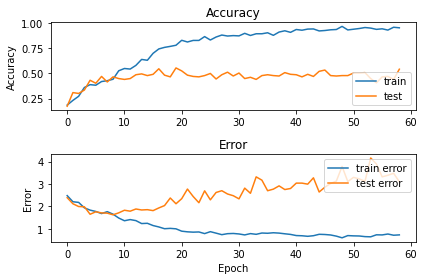

0.5423728813559322
CPU times: user 1min 18s, sys: 20.8 s, total: 1min 38s
Wall time: 2min


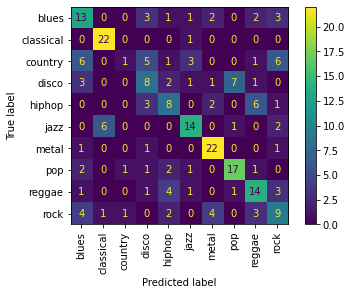

In [40]:
%%time
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=64, kernel_size =(3,3), strides = (1,1),
                           activation = "relu", padding = "same",
                           input_shape=(trainX.shape[1], trainX.shape[2], trainX.shape[3])),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), padding = "same"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=32, kernel_size =(3,3), strides = (1,1),
                           activation = "relu", padding = "same"),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), padding = "same"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=32, kernel_size =(2,2), strides = (1,1),
                           activation = "relu", padding = "same"),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), padding = "same"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=16, kernel_size =(1,1), strides = (1,1),
                           activation = "relu", padding = "same"),
    tf.keras.layers.MaxPool2D(pool_size=(1,1), padding = "same"),
    tf.keras.layers.BatchNormalization(),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation = "relu", 
                          kernel_regularizer = tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(10, activation = "linear")
])
## get output layer as logits for each class 
##(we can use softmax to get probabilities, but doing so makes model unstable:
# https://www.tensorflow.org/tutorials/quickstart/beginner
model.summary()
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

start = time.time()
fit = model.fit(trainX, trainY,
                validation_data = (testX,testY),
                epochs = 100, batch_size = 5,
                callbacks = [callback])
stop = time.time()
train_times.append(stop-start)


plot_results(fit)

probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(testX)
pred_labels = [np.argmax(prediction) for i,prediction in enumerate(predictions)]

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

ConfusionMatrixDisplay.from_predictions(
    y_true = [inv_labels[e] for i,e in enumerate(testY)],
    y_pred = [inv_labels[e] for i,e in enumerate(pred_labels)], 
    xticks_rotation= "vertical")
print(accuracy_score(testY,pred_labels))

### Thus, the best predictions are around 50% when using only the MFCC.

# Use SeLu
---

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_49 (Conv2D)           (None, 20, 1293, 64)      640       
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 10, 647, 64)       0         
_________________________________________________________________
batch_normalization_26 (Batc (None, 10, 647, 64)       256       
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 10, 647, 32)       18464     
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 5, 324, 32)        0         
_________________________________________________________________
batch_normalization_27 (Batc (None, 5, 324, 32)        128       
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 5, 324, 32)      

<Figure size 1440x1080 with 0 Axes>

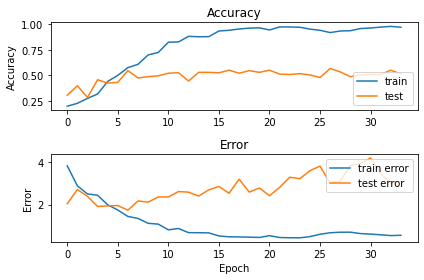

0.5127118644067796
CPU times: user 46.5 s, sys: 12.3 s, total: 58.8 s
Wall time: 1min 12s


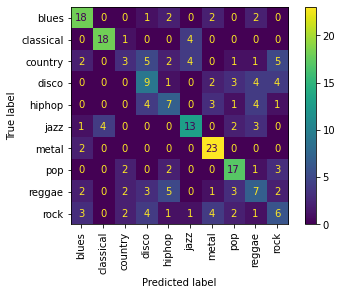

In [41]:
%%time
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=64, kernel_size =(3,3), strides = (1,1),
                           activation = "selu", kernel_initializer='lecun_normal',
                           padding = "same",
                           input_shape=(trainX.shape[1], trainX.shape[2], trainX.shape[3])),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), padding = "same"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=32, kernel_size =(3,3), strides = (1,1),
                           activation = "selu", kernel_initializer='lecun_normal',
                           padding = "same"),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), padding = "same"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=32, kernel_size =(2,2), strides = (1,1),
                           activation = "selu", kernel_initializer='lecun_normal',
                           padding = "same"),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), padding = "same"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=16, kernel_size =(1,1), strides = (1,1),
                           activation = "selu", kernel_initializer='lecun_normal',
                           padding = "same"),
    tf.keras.layers.MaxPool2D(pool_size=(1,1), padding = "same"),
    tf.keras.layers.BatchNormalization(),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation = "selu",  
                          kernel_initializer='lecun_normal', 
                          kernel_regularizer = tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(10, activation = "linear")
])
## get output layer as logits for each class 
##(we can use softmax to get probabilities, but doing so makes model unstable:
# https://www.tensorflow.org/tutorials/quickstart/beginner
model.summary()
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

start = time.time()
fit = model.fit(trainX, trainY,
                validation_data = (testX,testY),
                epochs = 100, batch_size = 5,
                callbacks = [callback])
stop = time.time()
train_times.append(stop-start)


plot_results(fit)

probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(testX)
pred_labels = [np.argmax(prediction) for i,prediction in enumerate(predictions)]

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

ConfusionMatrixDisplay.from_predictions(
    y_true = [inv_labels[e] for i,e in enumerate(testY)],
    y_pred = [inv_labels[e] for i,e in enumerate(pred_labels)], 
    xticks_rotation= "vertical")
print(accuracy_score(testY,pred_labels))